In [1]:
# ---------------------------
# AirFly Insights: Milestone 2
# Exploratory Data Analysis
# ---------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned CSV
df = pd.read_csv("AirlineData_Cleaned.csv")

# Set plot style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


In [3]:
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nMemory Info:\n")
print(df.info())

print("\nMissing Values:\n", df.isna().sum())
print("\nSummary Statistics:\n", df.describe())


Dataset Shape: (1936758, 33)

Columns:
 ['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FlightDate', 'Hour', 'Route']

Memory Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 33 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum 

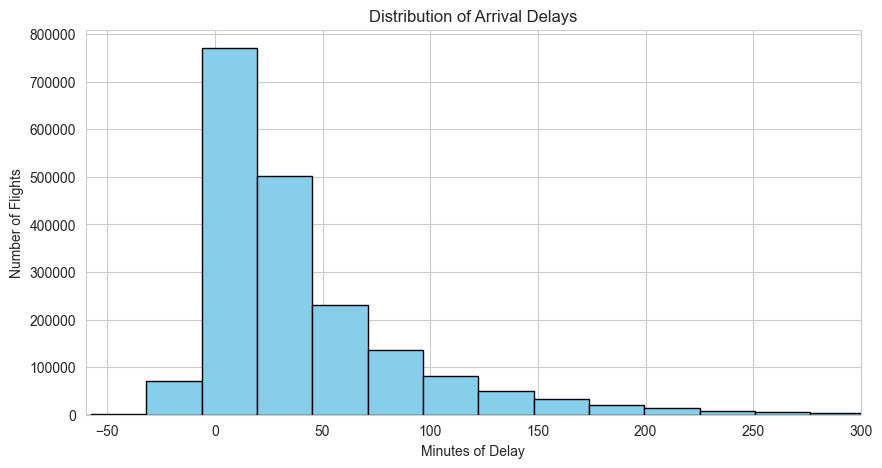

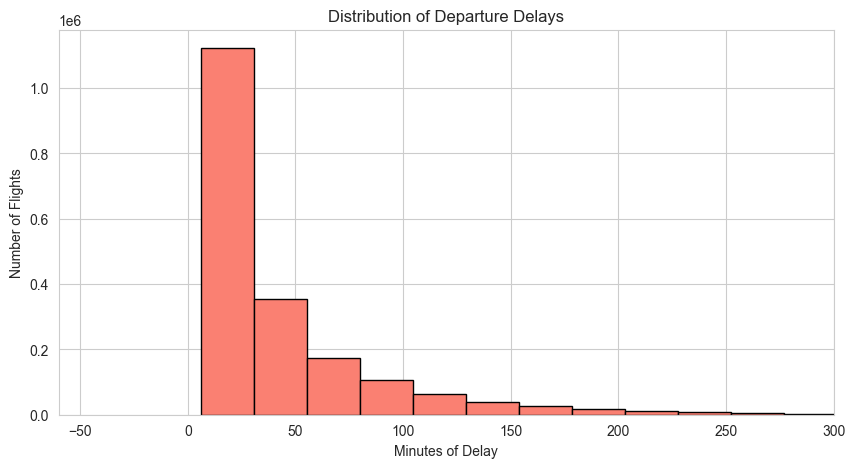

Percentage of Arrivals Delayed >0 mins: 88.98 %
Percentage of Departures Delayed >0 mins: 100.0 %


In [4]:
# Distribution of Arrival Delays
plt.hist(df['ArrDelay'], bins=100, color='skyblue', edgecolor='k')
plt.title("Distribution of Arrival Delays")
plt.xlabel("Minutes of Delay")
plt.ylabel("Number of Flights")
plt.xlim(-60, 300)
plt.show()

# Distribution of Departure Delays
plt.hist(df['DepDelay'], bins=100, color='salmon', edgecolor='k')
plt.title("Distribution of Departure Delays")
plt.xlabel("Minutes of Delay")
plt.ylabel("Number of Flights")
plt.xlim(-60, 300)
plt.show()

# % Flights delayed
print("Percentage of Arrivals Delayed >0 mins:", round((df['ArrDelay']>0).mean()*100,2), "%")
print("Percentage of Departures Delayed >0 mins:", round((df['DepDelay']>0).mean()*100,2), "%")


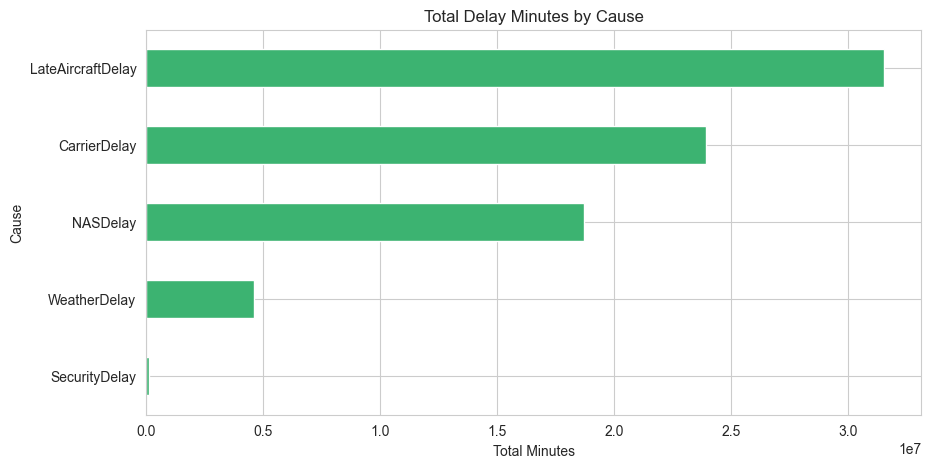

In [5]:
delay_causes = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
total_delays = df[delay_causes].sum().sort_values()

# Bar chart
total_delays.plot(kind='barh', color='mediumseagreen')
plt.title("Total Delay Minutes by Cause")
plt.xlabel("Total Minutes")
plt.ylabel("Cause")
plt.show()


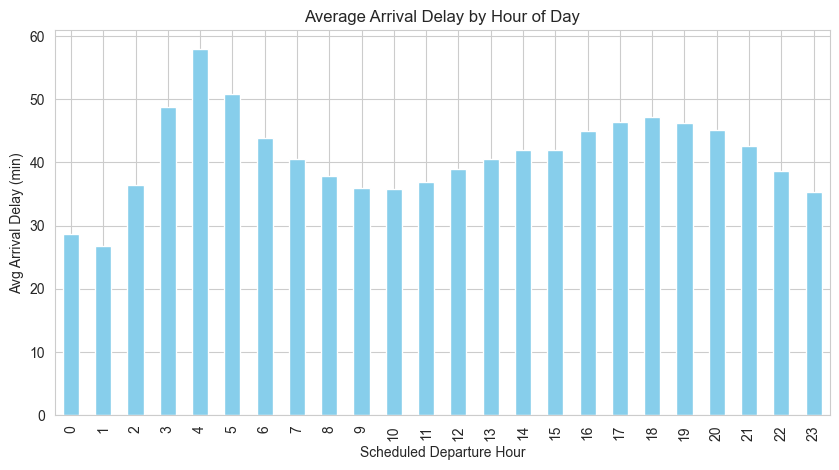

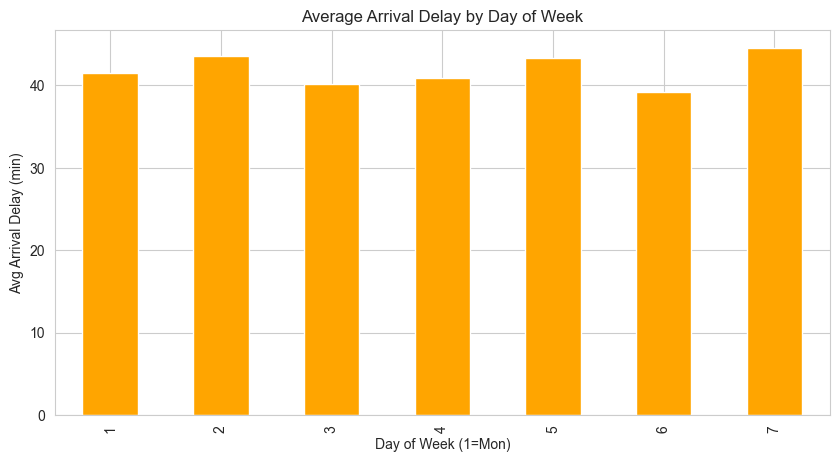

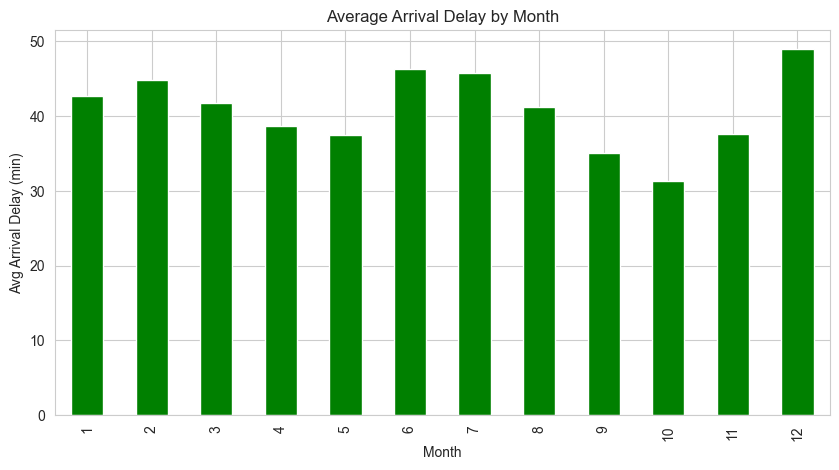

In [6]:
# Average delay by hour
df.groupby('Hour')['ArrDelay'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Arrival Delay by Hour of Day")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Avg Arrival Delay (min)")
plt.show()

# Average delay by Day of Week
df.groupby('DayOfWeek')['ArrDelay'].mean().plot(kind='bar', color='orange')
plt.title("Average Arrival Delay by Day of Week")
plt.xlabel("Day of Week (1=Mon)")
plt.ylabel("Avg Arrival Delay (min)")
plt.show()

# Average delay by Month
df.groupby('Month')['ArrDelay'].mean().plot(kind='bar', color='green')
plt.title("Average Arrival Delay by Month")
plt.xlabel("Month")
plt.ylabel("Avg Arrival Delay (min)")
plt.show()


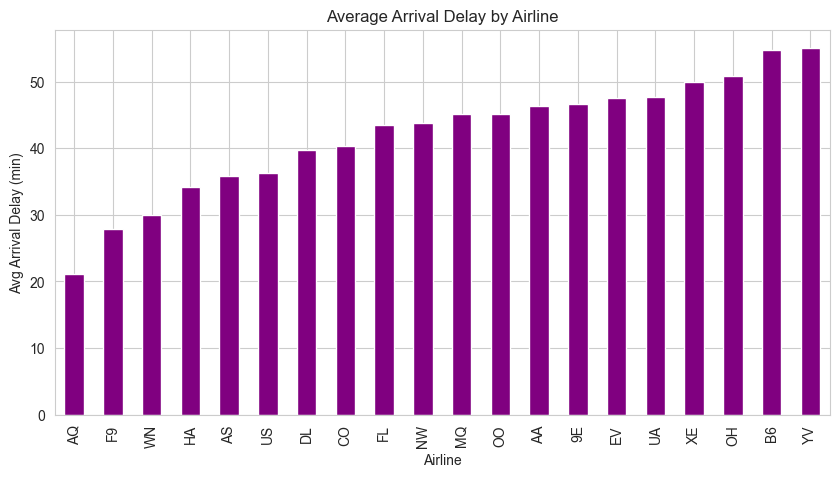

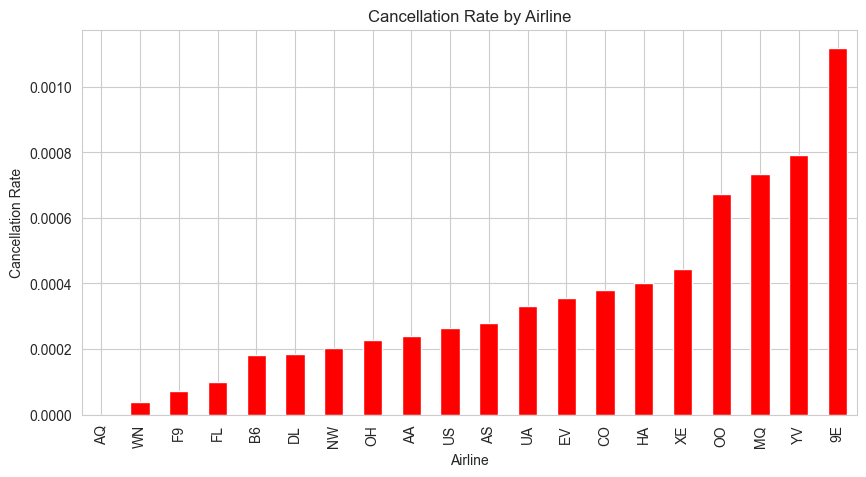

In [7]:
# Average Arrival Delay by Airline
df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values().plot(kind='bar', color='purple')
plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline")
plt.ylabel("Avg Arrival Delay (min)")
plt.show()

# Cancellation Rate by Airline
df.groupby('UniqueCarrier')['Cancelled'].mean().sort_values().plot(kind='bar', color='red')
plt.title("Cancellation Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate")
plt.show()


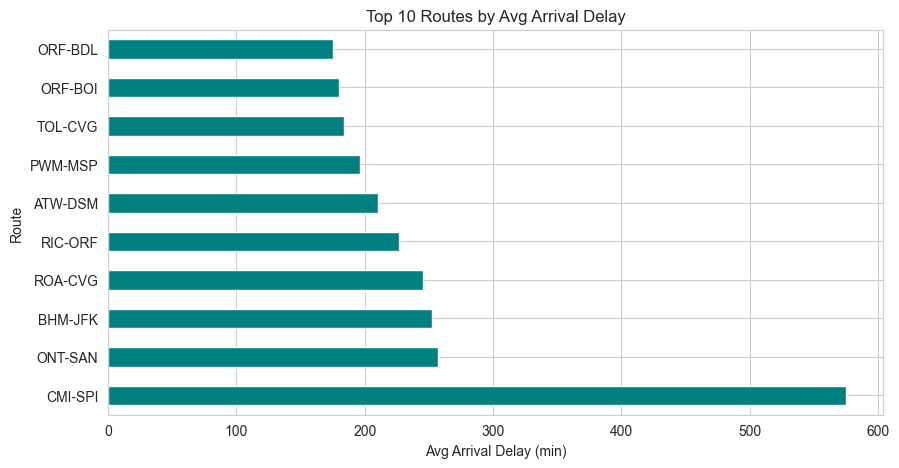

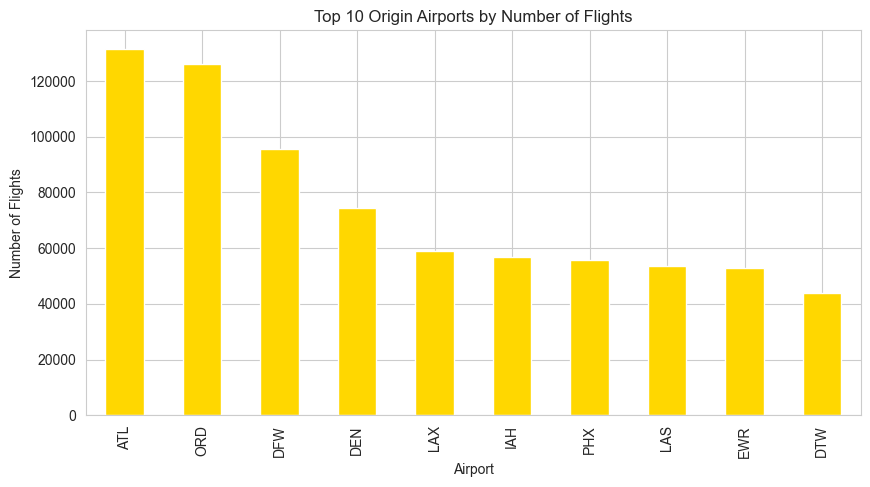

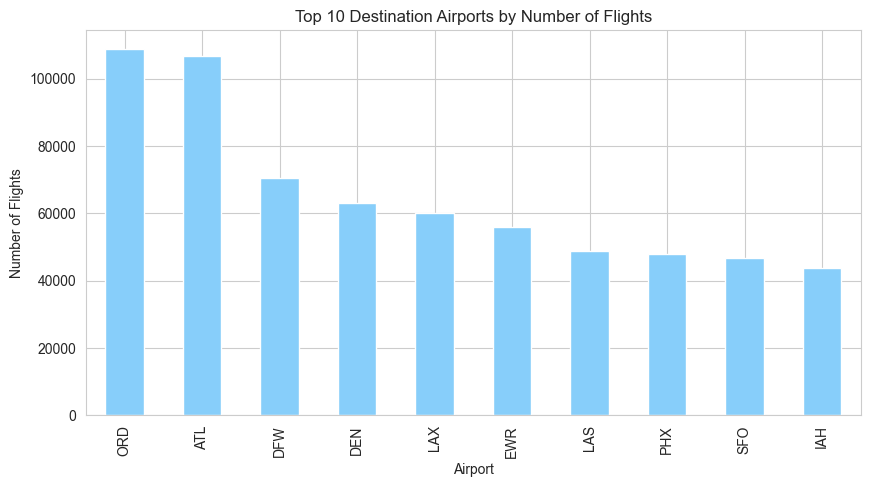

In [8]:
# Top 10 delayed routes
top_routes = df.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False).head(10)
top_routes.plot(kind='barh', color='teal')
plt.title("Top 10 Routes by Avg Arrival Delay")
plt.xlabel("Avg Arrival Delay (min)")
plt.ylabel("Route")
plt.show()

# Busiest Origin Airports
df['Origin'].value_counts().head(10).plot(kind='bar', color='gold')
plt.title("Top 10 Origin Airports by Number of Flights")
plt.xlabel("Airport")
plt.ylabel("Number of Flights")
plt.show()

# Busiest Destination Airports
df['Dest'].value_counts().head(10).plot(kind='bar', color='lightskyblue')
plt.title("Top 10 Destination Airports by Number of Flights")
plt.xlabel("Airport")
plt.ylabel("Number of Flights")
plt.show()


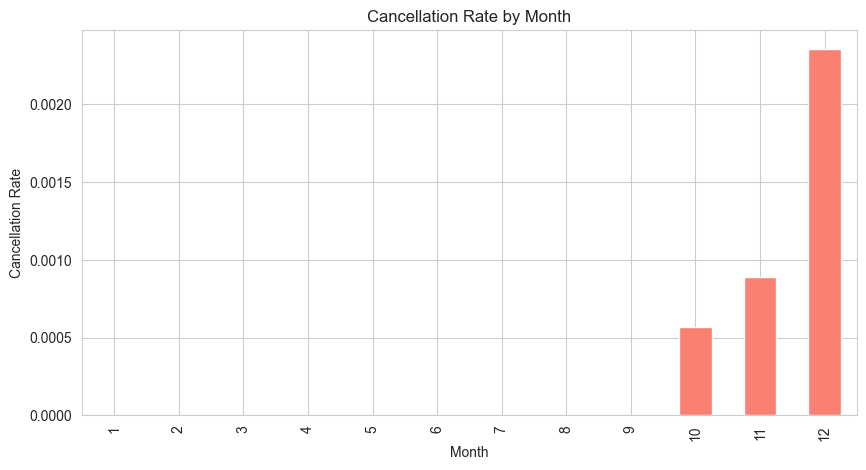

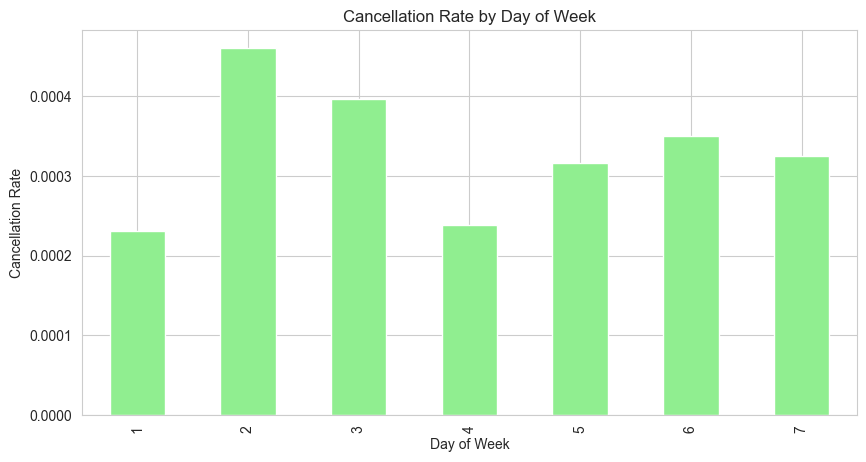

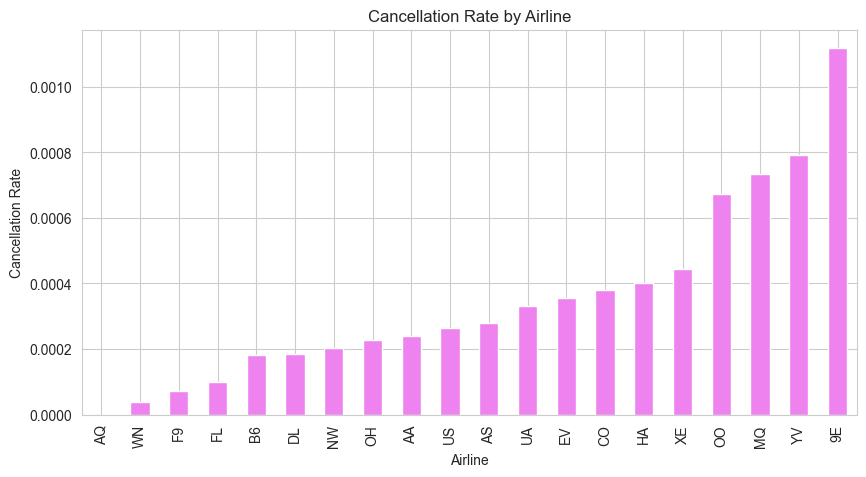

In [9]:
# Cancellation Rate by Month
df.groupby('Month')['Cancelled'].mean().plot(kind='bar', color='salmon')
plt.title("Cancellation Rate by Month")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.show()

# Cancellation Rate by Day of Week
df.groupby('DayOfWeek')['Cancelled'].mean().plot(kind='bar', color='lightgreen')
plt.title("Cancellation Rate by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Cancellation Rate")
plt.show()

# Cancellation Rate by Airline
df.groupby('UniqueCarrier')['Cancelled'].mean().sort_values().plot(kind='bar', color='violet')
plt.title("Cancellation Rate by Airline")
plt.xlabel("Airline")
plt.ylabel("Cancellation Rate")
plt.show()


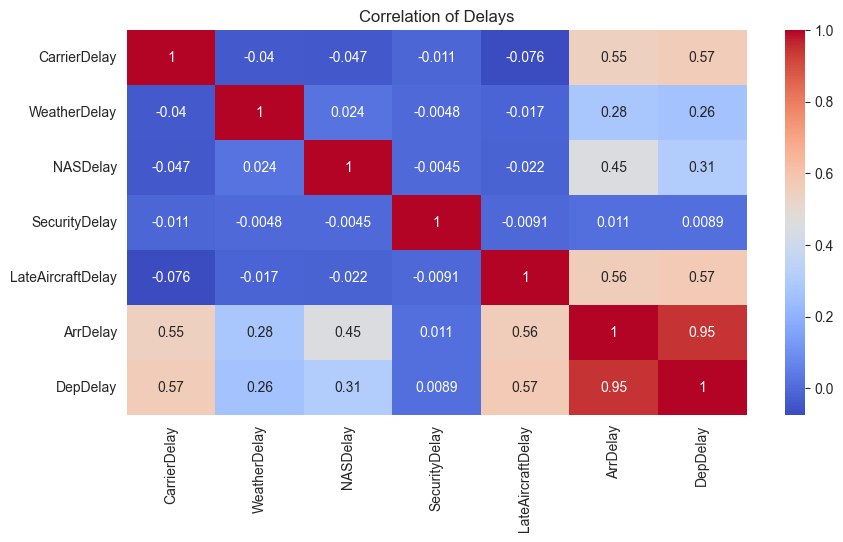

In [10]:
# Correlation heatmap (delays only)
sns.heatmap(df[delay_causes + ['ArrDelay','DepDelay']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation of Delays")
plt.show()


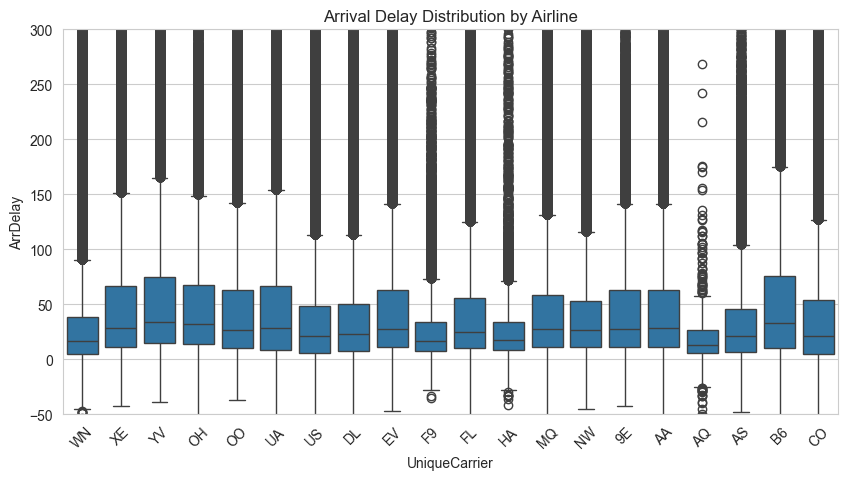

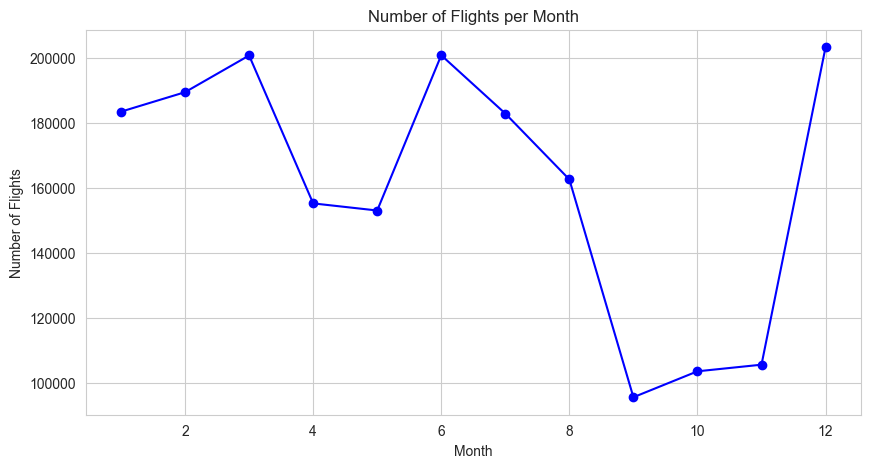

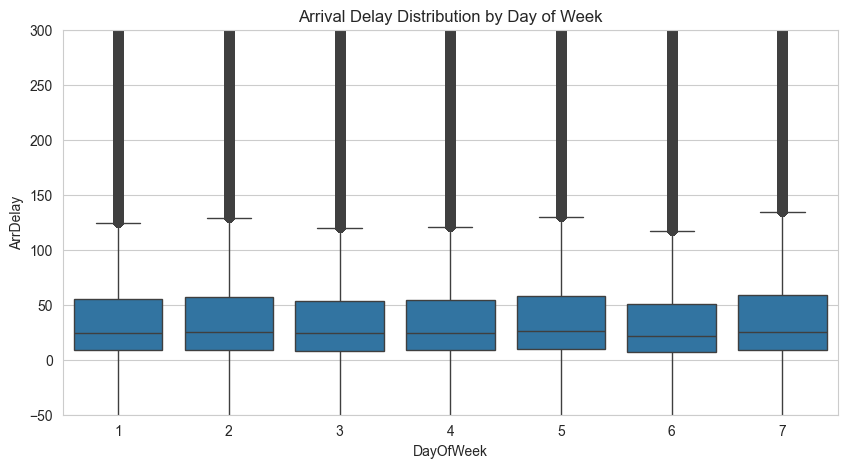

In [11]:
# Boxplot: Arrival Delay by Airline
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=df)
plt.title("Arrival Delay Distribution by Airline")
plt.xticks(rotation=45)
plt.ylim(-50, 300)  # focus on reasonable delay range
plt.show()

# Line plot: Flights per Month
df.groupby('Month').size().plot(kind='line', marker='o', color='blue')
plt.title("Number of Flights per Month")
plt.xlabel("Month")
plt.ylabel("Number of Flights")
plt.show()

# Boxplot: Delay by Day of Week
sns.boxplot(x='DayOfWeek', y='ArrDelay', data=df)
plt.title("Arrival Delay Distribution by Day of Week")
plt.ylim(-50, 300)
plt.show()


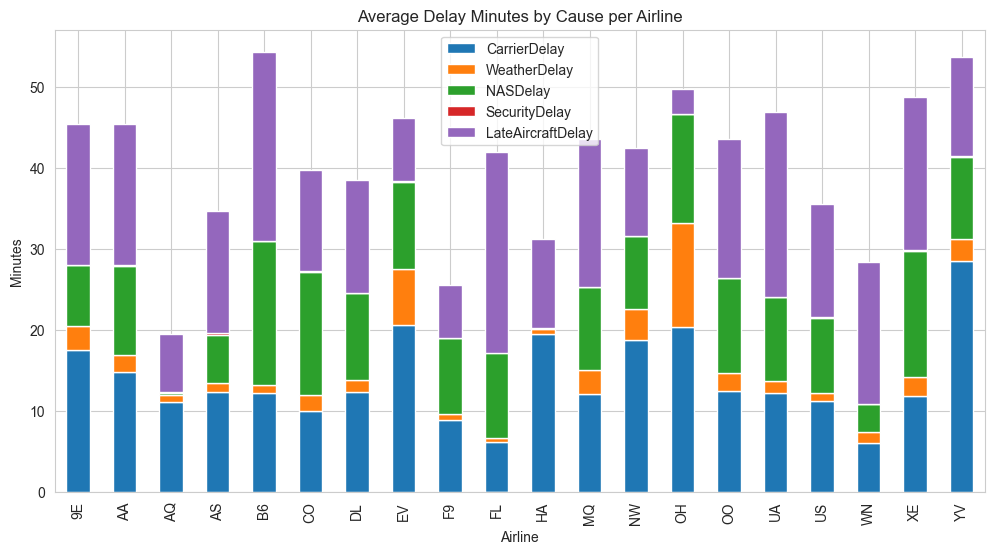

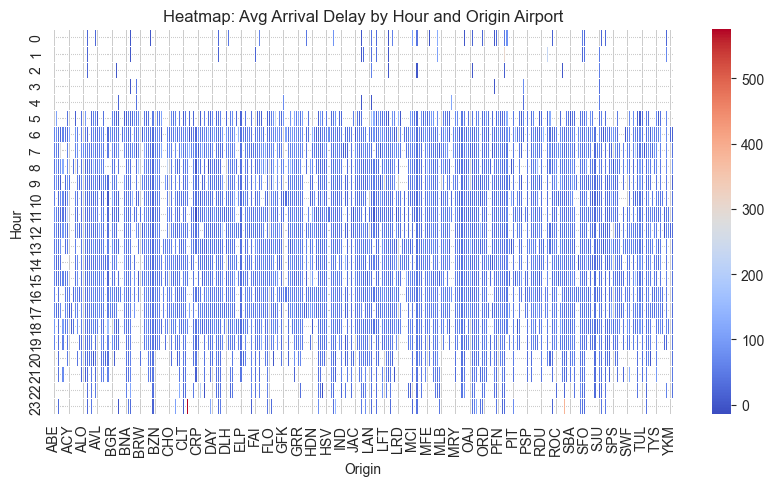

In [12]:
# Compare delay causes per airline
df.groupby('UniqueCarrier')[delay_causes].mean().plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Average Delay Minutes by Cause per Airline")
plt.ylabel("Minutes")
plt.xlabel("Airline")
plt.show()

# Heatmap: average arrival delay by Hour and Origin airport
hour_origin = df.pivot_table(values='ArrDelay', index='Hour', columns='Origin', aggfunc='mean')
sns.heatmap(hour_origin, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap: Avg Arrival Delay by Hour and Origin Airport")
plt.show()


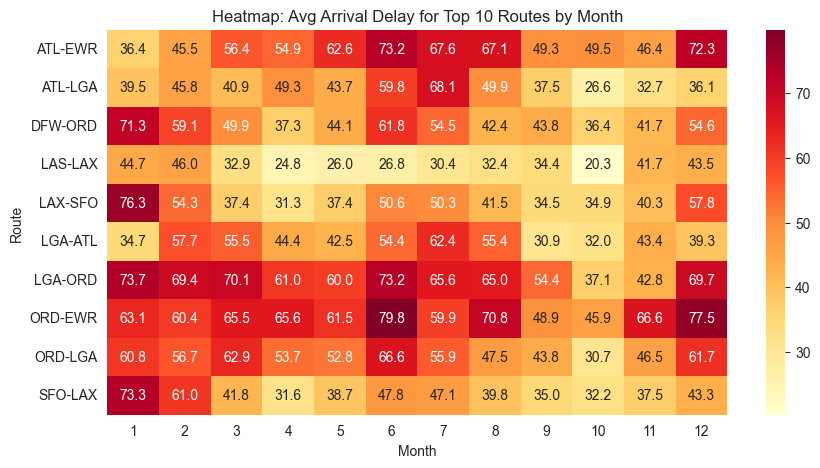

In [13]:
# Top 10 routes by number of flights
top_routes = df['Route'].value_counts().head(10).index
top_route_df = df[df['Route'].isin(top_routes)]

# Pivot table for heatmap: Route vs Month
route_month = top_route_df.pivot_table(values='ArrDelay', index='Route', columns='Month', aggfunc='mean')
sns.heatmap(route_month, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title("Heatmap: Avg Arrival Delay for Top 10 Routes by Month")
plt.show()


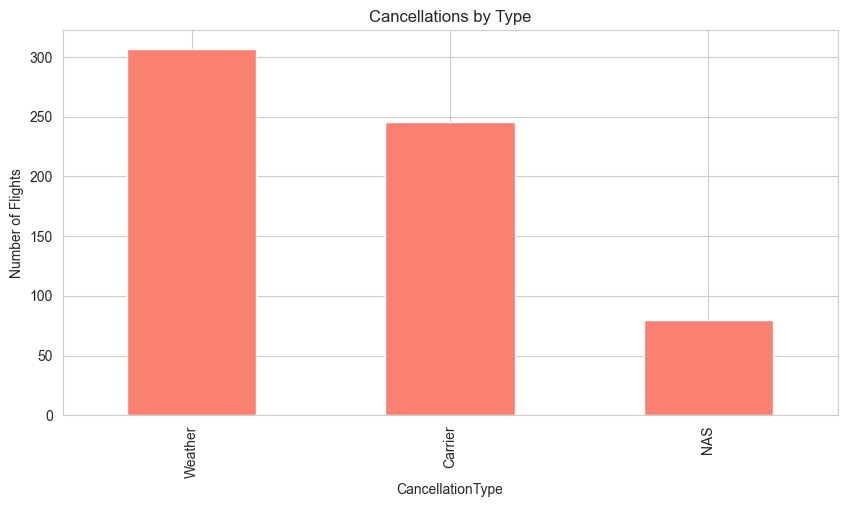

In [14]:
# Map cancellation codes to human-readable reasons
cancel_map = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}

# Fill NaN with 'Not Cancelled' for plotting
df['CancellationType'] = df['CancellationCode'].map(cancel_map)
df['CancellationType'] = df['CancellationType'].fillna('Not Cancelled')

# Count cancellations by type (exclude 'Not Cancelled' if needed)
cancel_type_counts = df[df['Cancelled']==1]['CancellationType'].value_counts()

# Plot
cancel_type_counts.plot(kind='bar', color='salmon')
plt.title("Cancellations by Type")
plt.ylabel("Number of Flights")
plt.show()
